In [1]:
#Importing required libraries
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import plotly.express as px

In [2]:
#Importing the given Data Set
data = pd.read_csv('eCell_Accessibility_Data.csv')

In [3]:
data.head()

,eCell_Id,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility
0,NR_eCell_1,160597,160650,174901,174999,684,684,160587,160597,99.99
1,NR_eCell_2,295681,295640,259667,260085,1279,1279,295653,295681,99.58
2,NR_eCell_3,185084,184899,197707,197799,782,782,185083,185084,99.76
3,NR_eCell_4,284459,284410,277712,278033,1691,1691,284401,284459,99.63
4,NR_eCell_5,27950,27959,29790,29808,77,77,27947,27950,99.99


In [4]:
# Checking the datatype of columns in the given Data Set
data.dtypes

eCell_Id                              object
RRC Setup Param1                       int64
RRC Setup Param2                       int64
Initial ERAB Establishment Param1      int64
Initial ERAB Establishment Param2      int64
Added ERAB Establishment Param1        int64
Added ERAB Establishment Param2        int64
S1 Setup Param1                        int64
S1 Setup Param2                        int64
Accessibility                        float64
dtype: object

In [5]:
#Checking the information of the given Data Set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   eCell_Id                           12181 non-null  object 
 1   RRC Setup Param1                   12181 non-null  int64  
 2   RRC Setup Param2                   12181 non-null  int64  
 3   Initial ERAB Establishment Param1  12181 non-null  int64  
 4   Initial ERAB Establishment Param2  12181 non-null  int64  
 5   Added ERAB Establishment Param1    12181 non-null  int64  
 6   Added ERAB Establishment Param2    12181 non-null  int64  
 7   S1 Setup Param1                    12181 non-null  int64  
 8   S1 Setup Param2                    12181 non-null  int64  
 9   Accessibility                      12181 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 951.8+ KB


In [6]:
#Checking for Nulls/NaNs.
data.isnull().sum()

eCell_Id                             0
RRC Setup Param1                     0
RRC Setup Param2                     0
Initial ERAB Establishment Param1    0
Initial ERAB Establishment Param2    0
Added ERAB Establishment Param1      0
Added ERAB Establishment Param2      0
S1 Setup Param1                      0
S1 Setup Param2                      0
Accessibility                        0
dtype: int64

In [7]:
#Checking the shape i.e. count of rows and columns in the given Data Set
data.shape

(12181, 10)

In [8]:
#Checking the size i.e. count of observations in the given Data Set
data.size

121810

In [9]:
#Describing the variables in the data set in terms of statistical metrics
data.describe()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility
count,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,59851.837944,59867.447418,72941.722683,73113.328216,529.989492,530.422872,59836.648715,59851.642886,99.761177
std,74553.336430,74555.105799,90136.467238,90253.285993,757.234717,757.846990,74534.825453,74553.277148,0.612481
min,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,86.360000
25%,10175.000000,10188.000000,12041.000000,12163.000000,73.000000,73.000000,10169.000000,10175.000000,99.770000
50%,27779.000000,27785.000000,33260.000000,33509.000000,250.000000,250.000000,27761.000000,27779.000000,99.930000
75%,84051.000000,84114.000000,103053.000000,103216.000000,693.000000,693.000000,84038.000000,84051.000000,99.980000
max,718066.000000,718058.000000,721065.000000,723348.000000,15270.000000,15270.000000,709361.000000,718066.000000,100.000000


(<AxesSubplot:xlabel='RRC Setup Param1'>,)

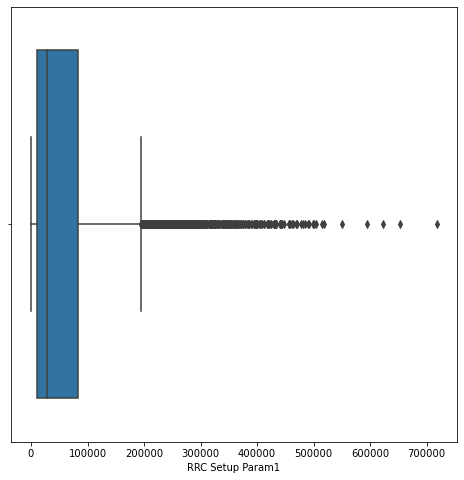

In [10]:
# RRC Setup Param1 distribition boxplot
plt.subplots(figsize=(8,8))
sns.boxplot(x = data['RRC Setup Param1']),

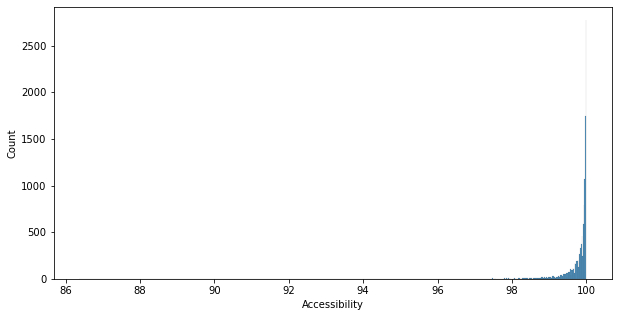

In [11]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.histplot(data['Accessibility'],ax=ax)
plt.show()


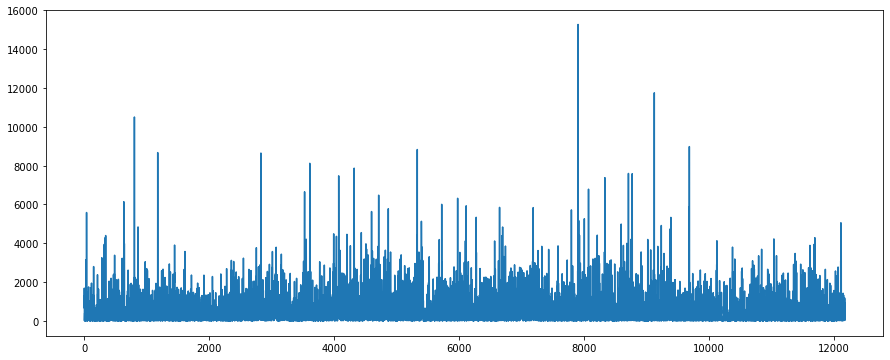

In [12]:

plt.subplots(figsize=(15,6))
plt.plot(data['Added ERAB Establishment Param1'])

In [13]:
#rrc success rate
RRC_Rate = data[['eCell_Id','RRC Setup Param2','RRC Setup Param1']]
RRC_Rate['RRC Success Rate'] = RRC_Rate['RRC Setup Param1']/RRC_Rate['RRC Setup Param2']*100
RRC_df= RRC_Rate[['eCell_Id','RRC Success Rate','RRC Setup Param2']]
ax=RRC_df.set_index('eCell_Id').sort_values('RRC Setup Param2', ascending=False).head(10)
ax


C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RRC Success Rate,RRC Setup Param2
eCell_Id,,
NR_eCell_8529,100.001114,718058
NR_eCell_9414,99.957024,653855
NR_eCell_979,99.978821,623256
NR_eCell_5400,99.934602,594823
NR_eCell_7918,99.909901,551617
NR_eCell_9686,99.943230,517877
NR_eCell_1449,99.972198,514343
NR_eCell_10036,99.993070,505078
NR_eCell_7327,99.909770,500943


<AxesSubplot:xlabel='eCell_Id'>

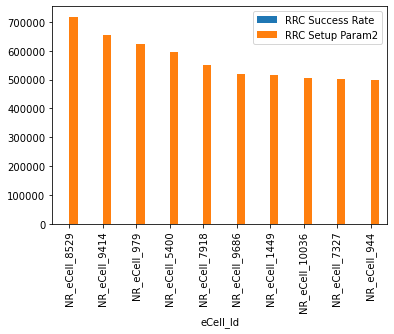

In [14]:
ax.plot(kind='bar')

In [15]:
#Initial ERAB Establishment success rate
Initial_ERAB_Establishment_Rate = data[['eCell_Id','Initial ERAB Establishment Param2','Initial ERAB Establishment Param1']]
Initial_ERAB_Establishment_Rate['Initial ERAB Establishment Success Rate'] = Initial_ERAB_Establishment_Rate['Initial ERAB Establishment Param1']/Initial_ERAB_Establishment_Rate['Initial ERAB Establishment Param2']*100
Initial_ERAB_Establishment_df= Initial_ERAB_Establishment_Rate[['eCell_Id','Initial ERAB Establishment Success Rate','Initial ERAB Establishment Param2']]
ax=Initial_ERAB_Establishment_df.set_index('eCell_Id').sort_values('Initial ERAB Establishment Param2', ascending=False).head(10)
ax

C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Initial ERAB Establishment Success Rate,Initial ERAB Establishment Param2
eCell_Id,,
NR_eCell_8529,99.684384,723348
NR_eCell_9414,99.755256,652927
NR_eCell_323,99.872173,648534
NR_eCell_6651,99.935296,632112
NR_eCell_5400,99.743187,630420
NR_eCell_8576,99.845050,586641
NR_eCell_979,99.884687,584496
NR_eCell_8008,99.796301,583705
NR_eCell_3556,99.791118,582148


<AxesSubplot:ylabel='eCell_Id'>

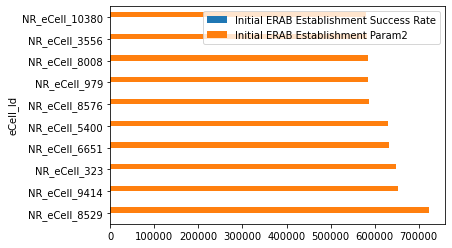

In [16]:
ax.plot(kind='barh')

In [17]:
#Initial ERAB Establishment success rate
Added_ERAB_Establishment_Attempt_Rate = data[['eCell_Id','Added ERAB Establishment Param2','Added ERAB Establishment Param1']]
Added_ERAB_Establishment_Attempt_Rate['Added_ERAB_Establishment_Success_Rate'] = Added_ERAB_Establishment_Attempt_Rate['Added ERAB Establishment Param1']/Added_ERAB_Establishment_Attempt_Rate['Added ERAB Establishment Param2']*100
Added_ERAB_Establishment_Attempt_df= Added_ERAB_Establishment_Attempt_Rate[['eCell_Id','Added ERAB Establishment Param2','Added_ERAB_Establishment_Success_Rate']]
ax=Added_ERAB_Establishment_Attempt_df.set_index('eCell_Id').sort_values('Added ERAB Establishment Param2', ascending=False).head(10)
ax

C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Added ERAB Establishment Param2,Added_ERAB_Establishment_Success_Rate
eCell_Id,,
NR_eCell_7908,15270,100.000000
NR_eCell_9128,11760,99.914966
NR_eCell_806,10527,99.781514
NR_eCell_9689,8981,99.988865
NR_eCell_5334,8833,99.966036
NR_eCell_1179,8672,100.000000
NR_eCell_2831,8648,100.000000
NR_eCell_3613,8148,99.656357
NR_eCell_4324,7884,99.809741


<AxesSubplot:ylabel='eCell_Id'>

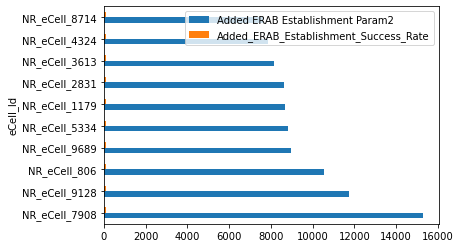

In [18]:
ax.plot(kind='barh')

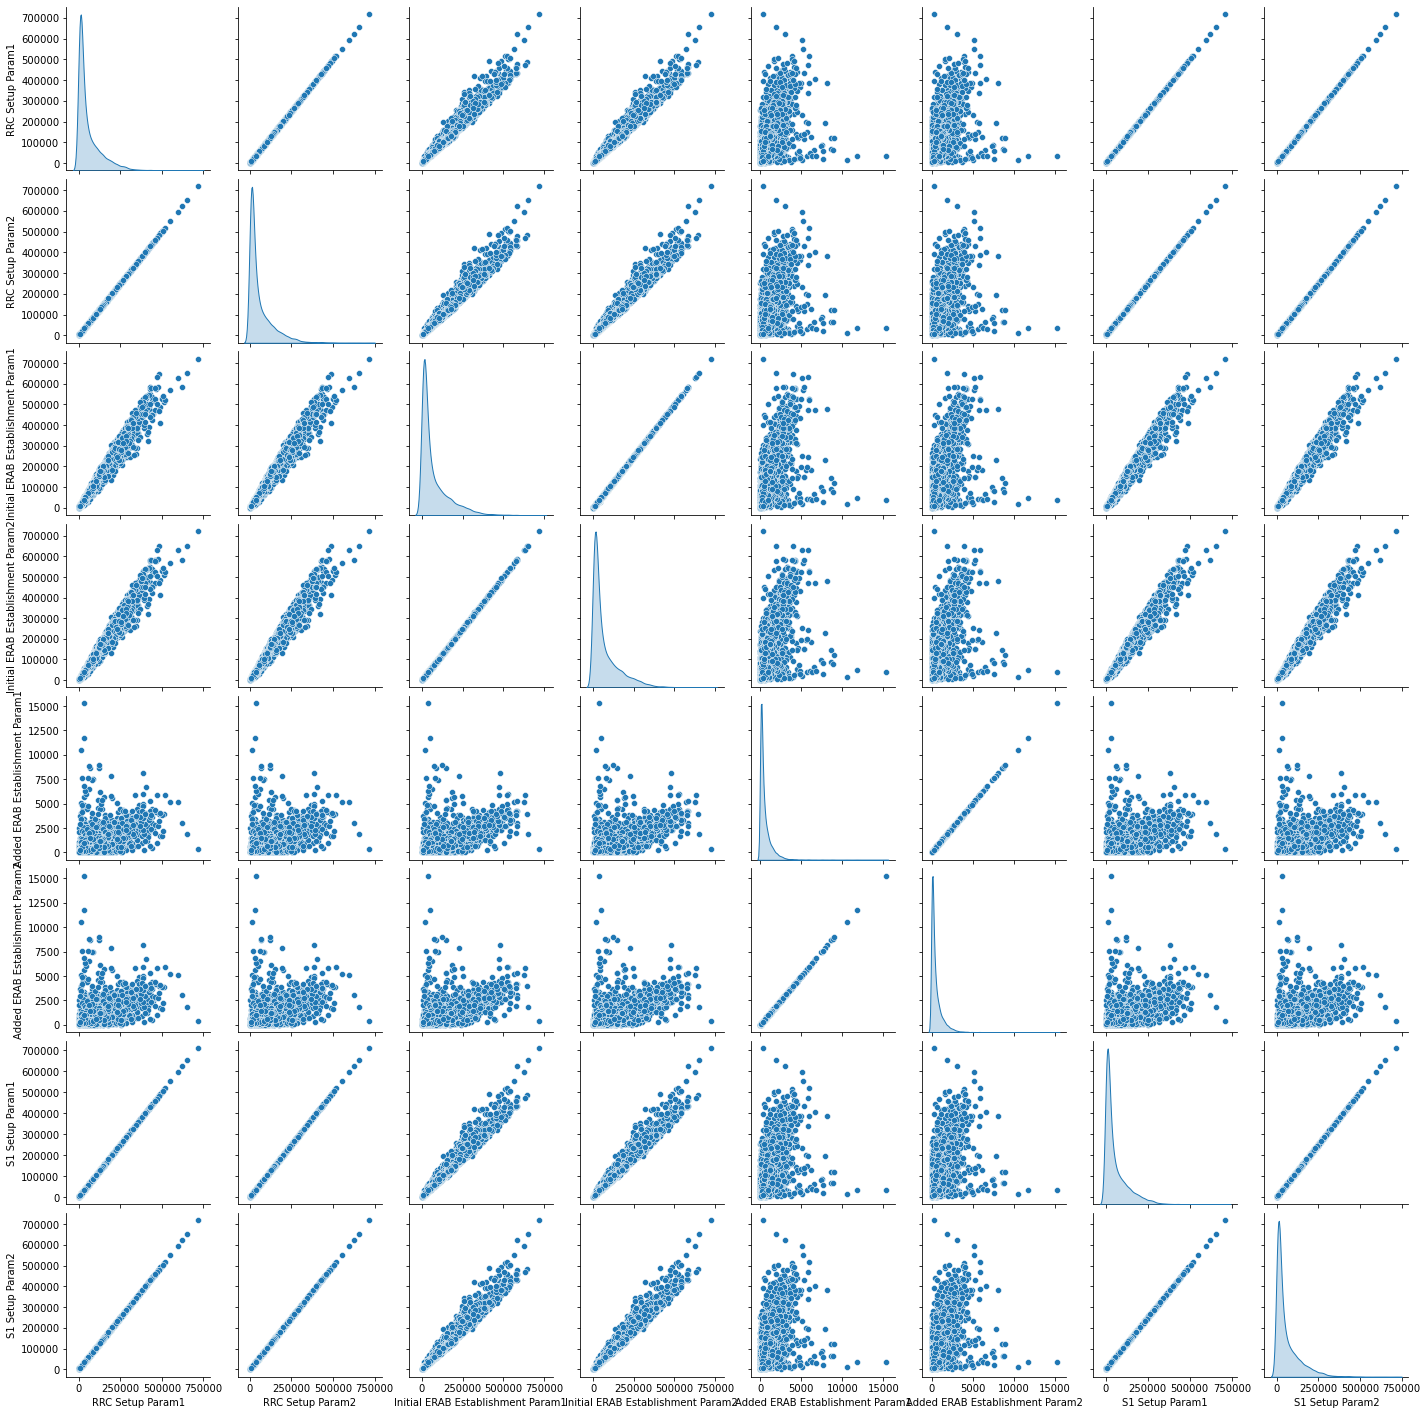

In [19]:
# Joint distribution plot of the independent variables
sns.pairplot(data[['RRC Setup Param1','RRC Setup Param2','Initial ERAB Establishment Param1','Initial ERAB Establishment Param2','Added ERAB Establishment Param1','Added ERAB Establishment Param2','S1 Setup Param1','S1 Setup Param2']], diag_kind="kde")

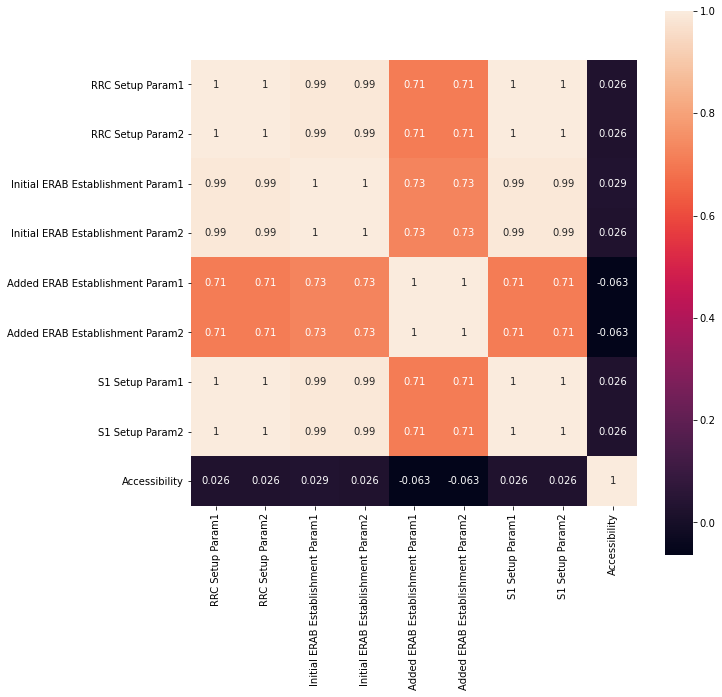

In [20]:
#Checking the correlation of given feature variables
corr = data.select_dtypes(include = ['float64','int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot = True)
plt.show()

In [21]:
#data_df= data.drop(['RRC Setup Attempts','Initial ERAB Establishment Attempt','Added ERAB Establishment Attempt','eCell_Id','S1 setup attempt'], axis=1)

In [22]:
#seperating independent and dependent variables
x = data.drop(['Accessibility','eCell_Id'], axis=1)
y = data['Accessibility']
x.shape, y.shape

((12181, 8), (12181,))

In [23]:
#Normalization of concerned features
#x = (X - X.mean()) / X.std()
#x.head(5)

In [24]:
#from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler
#scaler = preprocessing.MinMaxScaler()
#x = scaler.fit_transform(X)


In [25]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 56,test_size=0.3)

In [26]:
#Importing and applying Standard Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

### Linear Regression Model

In [27]:
from numpy import sqrt 
lin_reg = LinearRegression() 
lin_reg.fit(x_train_std,y_train) 
#Prediction using test set
y_pred = lin_reg.predict(x_test_std) 
mae=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=sqrt(mse)
# Printing the metrics 
print('R2 square:',metrics.r2_score(y_test, y_pred)) 
print('MAE: ', mae) 
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.46262582824047127
MAE:  0.20033104011155708
MSE:  0.14849492051254382
RMSE:  0.38535038667755844


In [28]:
x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,98.826921
1,94791,94799,125429,125456,479,479,94787,94791,99.99,99.920883
2,3090,3090,3203,3203,18,18,3090,3090,100.00,99.790501
3,11036,11050,11372,11407,266,266,11025,11036,99.85,99.786958
4,54623,54638,68835,68870,230,230,54622,54623,100.00,99.847739


### Decision Tree Regressor

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [2, 6, 12, 24],
             }
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(),param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
tree_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40]},
                   verbose=2)

In [31]:
y_pred = tree_reg.predict(x_test_std) 
mae=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred)
rmse=sqrt(mse)
print('R2 square:',metrics.r2_score(y_test, y_pred)) 
print('MAE: ', mae) 
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.07883074669009893
MAE:  0.21618560564487427
MSE:  0.25455066923101993
RMSE:  0.5045301469991857


In [32]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,99.794167
1,94791,94799,125429,125456,479,479,94787,94791,99.99,99.822286
2,3090,3090,3203,3203,18,18,3090,3090,100.00,99.622222
3,11036,11050,11372,11407,266,266,11025,11036,99.85,99.748261
4,54623,54638,68835,68870,230,230,54622,54623,100.00,99.988500


### Greadient Boost Regressor

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {"learning_rate"    : [0.01, 0.1, 0.3],
              "subsample"        : [0.5, 1.0],
              "max_depth"        : [3, 4, 5, 10, 15, 20],
              "max_features"     : ['auto', 'sqrt'],
              "min_samples_split": [5, 10, 20, 40],
              "min_samples_leaf" : [2, 6, 12, 24]
             }
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
grad_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 4, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40],
                                        'subsample': [0.5, 1.0]},
                   verbose=2)

In [34]:
y_pred = grad_reg.predict(x_test_std)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.3641288024317063
MAE:  0.21594578226553254
MSE:  0.1757130280935306
RMSE:  0.41918137851475534


In [35]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,99.151160
1,94791,94799,125429,125456,479,479,94787,94791,99.99,99.905757
2,3090,3090,3203,3203,18,18,3090,3090,100.00,99.224310
3,11036,11050,11372,11407,266,266,11025,11036,99.85,99.539222
4,54623,54638,68835,68870,230,230,54622,54623,100.00,99.858474


### Adaboost Regressor

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
param_grid = {"learning_rate" : [0.01, 0.1, 0.3],
              "loss"          : ['linear', 'square', 'exponential']
             }
ada_reg = RandomizedSearchCV(AdaBoostRegressor( DecisionTreeRegressor(), n_estimators=100), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
ada_reg.fit(x_train_std, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\renuk\anaconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning:

The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                               n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'loss': ['linear', 'square',
                                                 'exponential']},
                   verbose=2)

In [37]:
y_pred = ada_reg.predict(x_test_std)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
# Printing the metri
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.22756719564474748
MAE:  0.18021340629274918
MSE:  0.2134496853625169
RMSE:  0.4620061529487642


In [38]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,99.14
1,94791,94799,125429,125456,479,479,94787,94791,99.99,99.99
2,3090,3090,3203,3203,18,18,3090,3090,100.00,99.95
3,11036,11050,11372,11407,266,266,11025,11036,99.85,99.69
4,54623,54638,68835,68870,230,230,54622,54623,100.00,100.00


### Support Vector Regression

In [39]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train_std,y_train)
y_pred_svm=regressor.predict(x_test_std)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
rmse= sqrt(mse)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.03635840446430305
MAE:  0.1922146590646459
MSE:  0.2662872345783091
RMSE:  0.5160302651766746


In [40]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,99.14
1,94791,94799,125429,125456,479,479,94787,94791,99.99,99.99
2,3090,3090,3203,3203,18,18,3090,3090,100.00,99.95
3,11036,11050,11372,11407,266,266,11025,11036,99.85,99.69
4,54623,54638,68835,68870,230,230,54622,54623,100.00,100.00


### Regression Using Neural Network

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError

In [42]:
from tensorflow.keras import Sequential
hidden_units1 = 60
hidden_units2 = 40
hidden_units3 = 20
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [43]:
# loss function
mse = MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(
    loss=mse,
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse,rmse]
)
# train the model
history = model.fit(
    x_train_std, 
    y_train, 
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
107/107 [==============================] - 0s 3ms/step - loss: 2157.2256 - mean_squared_error: 2148.7891 - root_mean_squared_error: 46.4459 - val_loss: 12.5323 - val_mean_squared_error: 12.4632 - val_root_mean_squared_error: 3.5401
Epoch 2/20
107/107 [==============================] - 0s 1ms/step - loss: 141.8277 - mean_squared_error: 141.6539 - root_mean_squared_error: 11.9091 - val_loss: 17.2923 - val_mean_squared_error: 17.2108 - val_root_mean_squared_error: 4.1584
Epoch 3/20
107/107 [==============================] - 0s 1ms/step - loss: 131.4034 - mean_squared_error: 131.4008 - root_mean_squared_error: 11.4631 - val_loss: 4.9851 - val_mean_squared_error: 4.9953 - val_root_mean_squared_error: 2.2327
Epoch 4/20
107/107 [==============================] - 0s 4ms/step - loss: 128.9339 - mean_squared_error: 129.5651 - root_mean_squared_error: 11.3549 - val_loss: 23.4196 - val_mean_squared_error: 23.3978 - val_root_mean_squared_error: 4.8394
Epoch 5/20
107/107 [================

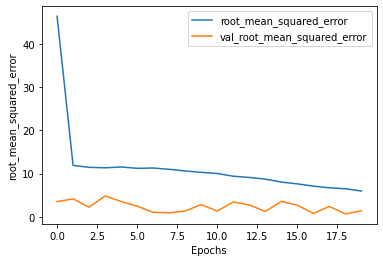

In [44]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'root_mean_squared_error')

In [45]:
y_pred= model.predict(x_test_std).tolist()
#pred=dt.predict(X_test).tolist()
#y_test=y_test.tolist()
for X,Y in zip(y_pred, y_test):
    print("Model:", X, "actual:", Y)
    

Model: [98.41374969482422] actual: 98.43
Model: [98.52532958984375] actual: 99.99
Model: [98.49153900146484] actual: 100.0
Model: [98.46778869628906] actual: 99.85
Model: [98.52597045898438] actual: 100.0
Model: [98.48622131347656] actual: 99.95
Model: [98.48802185058594] actual: 99.98
Model: [98.49700927734375] actual: 99.98
Model: [98.49971771240234] actual: 99.96
Model: [98.23330688476562] actual: 99.93
Model: [98.51715850830078] actual: 99.97
Model: [98.51669311523438] actual: 99.69
Model: [98.4156494140625] actual: 99.8
Model: [98.54759216308594] actual: 99.99
Model: [98.48263549804688] actual: 99.98
Model: [98.50019836425781] actual: 99.99
Model: [98.48983764648438] actual: 99.92
Model: [98.49320220947266] actual: 99.99
Model: [98.54065704345703] actual: 99.93
Model: [98.52980041503906] actual: 99.85
Model: [98.50733947753906] actual: 99.99
Model: [98.51068878173828] actual: 100.0
Model: [98.47975158691406] actual: 100.0
Model: [98.48825073242188] actual: 99.97
Model: [98.3288421

In [46]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,98.413750
1,94791,94799,125429,125456,479,479,94787,94791,99.99,98.525330
2,3090,3090,3203,3203,18,18,3090,3090,100.00,98.491539
3,11036,11050,11372,11407,266,266,11025,11036,99.85,98.467789
4,54623,54638,68835,68870,230,230,54622,54623,100.00,98.525970


In [47]:
import tensorflow as tf
import keras
from keras import utils as np_utils
from tensorflow.keras import layers


In [48]:
input_size=8
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(x_train_std,y_train,epochs=10,verbose=1)

Epoch 1/10
267/267 [==============================] - 0s 481us/step - loss: 479.5546
Epoch 2/10
267/267 [==============================] - 1s 2ms/step - loss: 0.4179
Epoch 3/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4176
Epoch 4/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4154
Epoch 5/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4152
Epoch 6/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4158
Epoch 7/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4139
Epoch 8/10
267/267 [==============================] - 1s 2ms/step - loss: 0.4140
Epoch 9/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4152
Epoch 10/10
267/267 [==============================] - 1s 3ms/step - loss: 0.4154


In [49]:
models.layers[0].get_weights()

[array([[-0.8322996 ],
        [-0.04038892],
        [-0.13808765],
        [ 0.28601933],
        [ 0.47069794],
        [-0.5543262 ],
        [ 0.2878849 ],
        [ 0.4765093 ]], dtype=float32),
 array([99.76801], dtype=float32)]

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                540       
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,821
Trainable params: 3,821
Non-trainable params: 0
______________________________________________________

In [51]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [52]:
y_pred= model.predict(x_test_std)


In [53]:
#x_test= pd.DataFrame(x_test)
y_pred= pd.DataFrame(y_pred)
y_pred.columns= ['Pred_Accessibility']
pred_df = pd.concat([x_test.reset_index(drop='True'),y_test.reset_index(drop='True'),y_pred.reset_index(drop='True')],axis=1)
pred_df.head()

,RRC Setup Param1,RRC Setup Param2,Initial ERAB Establishment Param1,Initial ERAB Establishment Param2,Added ERAB Establishment Param1,Added ERAB Establishment Param2,S1 Setup Param1,S1 Setup Param2,Accessibility,Pred_Accessibility
0,23363,23367,28452,29639,687,687,23349,23363,98.43,98.413750
1,94791,94799,125429,125456,479,479,94787,94791,99.99,98.525330
2,3090,3090,3203,3203,18,18,3090,3090,100.00,98.491539
3,11036,11050,11372,11407,266,266,11025,11036,99.85,98.467789
4,54623,54638,68835,68870,230,230,54622,54623,100.00,98.525970


In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

1.396215085470446

In [55]:
rmse = sqrt(mse)
rmse

1.1816154558359695